# Movies Data Analysis
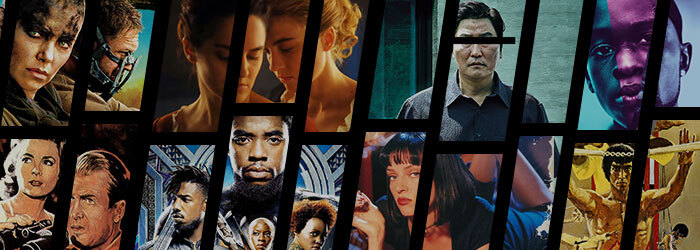
## Overview
  Microsoft wishes to venture into the movies industry, however, they have little to no experience
  in the area and therefore they don't know where to start. This research uses exploratory data to
  give them an idea on where to start.
## Problem Statement
Microsoft lacks expertise in the field of movie production, yet they intend to establish a new movie studio.

For the new movie studio to generate profit, Microsoft should consider the following factors:
- The most popular genre
- The run time for the movies
- The top studios
- The ideal period to release the movies based on the Average ROI of film release by month







# Importing Libraries

In [1]:
#The required libraries
import pandas as pd 
import numpy as np
import sqlite3




# Reading the Data
This analysis will involve the utilization of datasets from two distinct sources:
- Box Office Mojo
- IMDB


In [2]:
movie_budgets = pd.read_csv("C:\\Users\\User\\Downloads\\tn.movie_budgets (2).csv\\tn.movie_budgets.csv")
movie_gross = pd.read_csv("C:\\Users\\User\\Downloads\\bom.movie_gross (2).csv\\bom.movie_gross.csv")
tmdb = pd.read_csv("C:\\Users\\User\\Downloads\\tmdb.movies.csv")
conn = sqlite3.connect("C:\\Users\\User\\Downloads\\im.db\\im.db")
query = "SELECT * FROM movie_basics"
query_ratings = "SELECT * FROM movie_ratings"
movie_basics  = pd.read_sql(query,conn)
movie_ratings = pd.read_sql(query_ratings,conn)
conn.close()


# Inspecting the Data
After loading our data, we then scrutinize it to know what parts to rectify by:
- Inspecting its shape
- Inspecting volume
- Inspecting its feature types 
- Checking whether there are any missing values

In [3]:
movie_budgets.info()
movie_budgets.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
movie_gross.info()
movie_gross.head() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
movie_basics.info()
movie_basics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
movie_ratings.info()
movie_ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


# Data Preparation

## Cleaning the Data

In [7]:
# Organize the imdb data for runtime analysis. Extracts columns needed to merge and the runtime data.
movie_b = movie_basics[['primary_title', 'start_year', 'runtime_minutes']]

# Filter out movies that have not been produce and those wthout runtime entries.
movie_b = movie_b[movie_b['start_year'] < 2022]
movie_b = movie_b.dropna(axis=0, subset=['runtime_minutes'])
movie_b.head()

,primary_title,start_year,runtime_minutes
0,Sunghursh,2013,175.0
1,One Day Before the Rainy Season,2019,114.0
2,The Other Side of the Wind,2018,122.0
4,The Wandering Soap Opera,2017,80.0
5,A Thin Life,2018,75.0


In [8]:
# Change the year data to match the IMDB format of only the year number using .to_datetime().
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])
movie_budgets['release_year'] = movie_budgets['release_date'].dt.year
tmdb['release_date'] = pd.to_datetime(tmdb['release_date'])
tmdb['release_year'] = tmdb['release_date'].dt.year

# Create a month datetime column of the release dates sing .to_datetime().
movie_budgets['month_dt'] = pd.to_datetime(movie_budgets['release_date']).dt.month

# Create a month string column of the release dates
movie_budgets['month'] = movie_budgets['release_date'].dt.month
movie_budgets = movie_budgets.drop('release_date', 1)

C:\Users\User\AppData\Local\Temp\ipykernel_14160\1513421822.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  movie_budgets = movie_budgets.drop('release_date', 1)


In [9]:
# Converting the columns specified below to integer data types.
cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
movie_budgets[cols] = movie_budgets[cols].replace('[\$,]', '', regex=True).astype('int64')
movie_budgets.head()


,id,movie,production_budget,domestic_gross,worldwide_gross,release_year,month_dt,month
0,1,Avatar,425000000,760507625,2776345279,2009,12,12
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5,5
2,3,Dark Phoenix,350000000,42762350,149762350,2019,6,6
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,5
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12,12


In [10]:
# Converting all title data to strings and title case it.
movie_budgets['movie'] = movie_budgets['movie'].str.title()
movie_gross['title'] = movie_gross['title'].str.title()
movie_basics['primary_title'] = movie_basics['primary_title'].str.title()
tmdb['title'] = tmdb['title'].str.title()

In [11]:
# Creating profit margin columns
movie_budgets['dom_profit_margin'] = (movie_budgets['domestic_gross'] - movie_budgets['production_budget']) / movie_budgets['domestic_gross'] * 100 
movie_budgets['ww_profit_margin'] = (movie_budgets['worldwide_gross'] - movie_budgets['production_budget']) / movie_budgets['worldwide_gross'] * 100

In [12]:
#Add a column 'worldwide_profit' which is the difference between 'worldwide_gross' and 'production_budget'
movie_budgets['worldwide_profit'] = (movie_budgets['worldwide_gross'] - movie_budgets['production_budget'])

# Use the newly created column above to calculate ROI in percentage form 
movie_budgets['ROI'] = (movie_budgets['worldwide_profit']  / movie_budgets['production_budget']) * 100

In [13]:
# limit the budget_df to movies released after 2000
movie_budgets = movie_budgets[movie_budgets['release_year'] > 2000]

In [14]:
# Creating a new data frame grouped by months and their median values.
month_new = movie_budgets.groupby('month').median()

month_new = month_new.reset_index()

month_new = month_new.sort_values('month_dt')

month_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

month_new['month_name'] = month_dict.values() 

# Merging the Datasets

In [15]:
# Merge the datasets on title and year.
movie_budgets_basics = movie_budgets.merge(movie_basics,left_on=['movie', 'release_year'],right_on=['primary_title', 'start_year'],how='inner')
movie_budgets_basics = movie_budgets_basics.loc[movie_budgets_basics['domestic_gross'] > 0]

In [16]:
# Creating a new dataframe with studio and box office data 
studios_movie = movie_gross[['title', 'studio', 'year']].merge(movie_budgets, left_on=['title', 'year'], right_on=['movie', 'release_year'])

In [17]:
# Group the data in studios_movie by studio
avg_studio = studios_movie.groupby('studio').mean().reset_index()
avg_studio = avg_studio[avg_studio['dom_profit_margin'] > 0]

# Analysis

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_context('poster')
sns.set_style('dark')

# Runtime Distribution

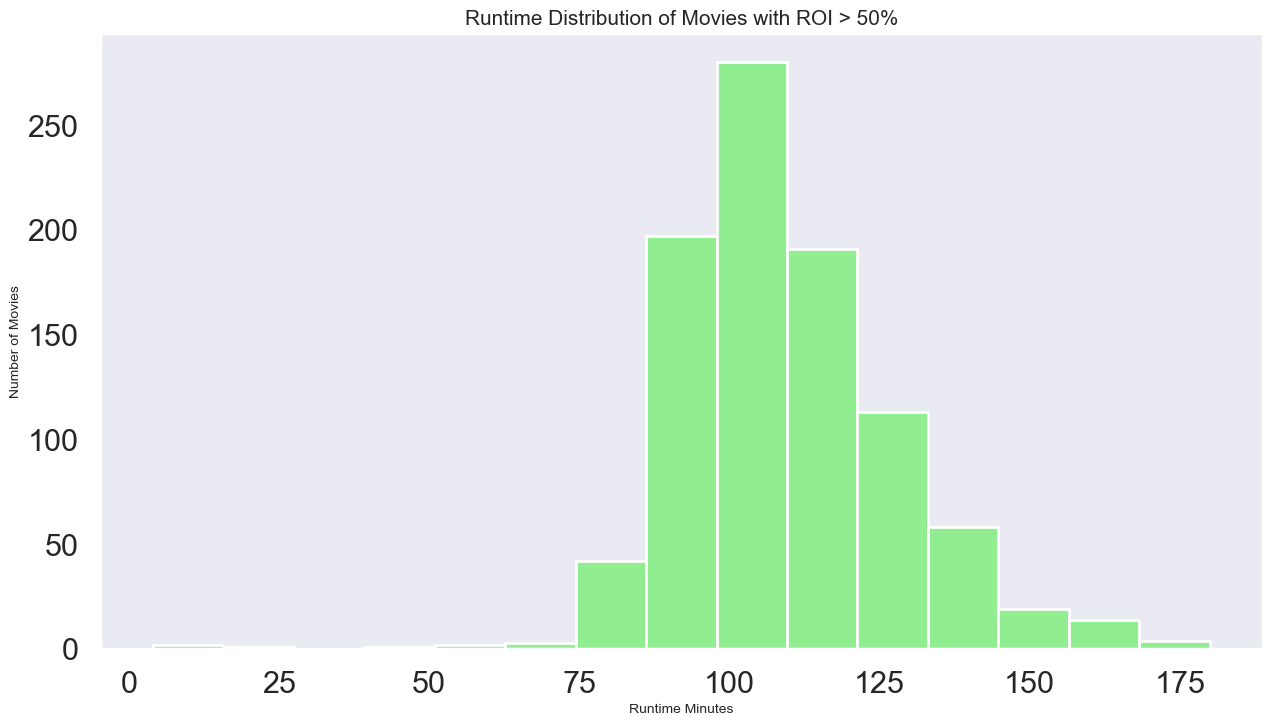

In [19]:
fig, ax = plt.subplots(figsize=(15,8))


ax.hist(movie_budgets_basics['runtime_minutes'].loc[(movie_budgets_basics['runtime_minutes'] < 250) & (movie_budgets_basics['ROI'] > 50)], bins=15, color='lightgreen')

ax.tick_params(axis="x")
ax.set_xlabel("Runtime Minutes", fontsize=10)
ax.set_ylabel("Number of Movies", fontsize=10)
ax.set_title("Runtime Distribution of Movies with ROI > 50%", fontsize=15);

plt.savefig('./images/Runtime Distribution of Movies with ROI.png', dpi = 150)

# Top Grossing Studios

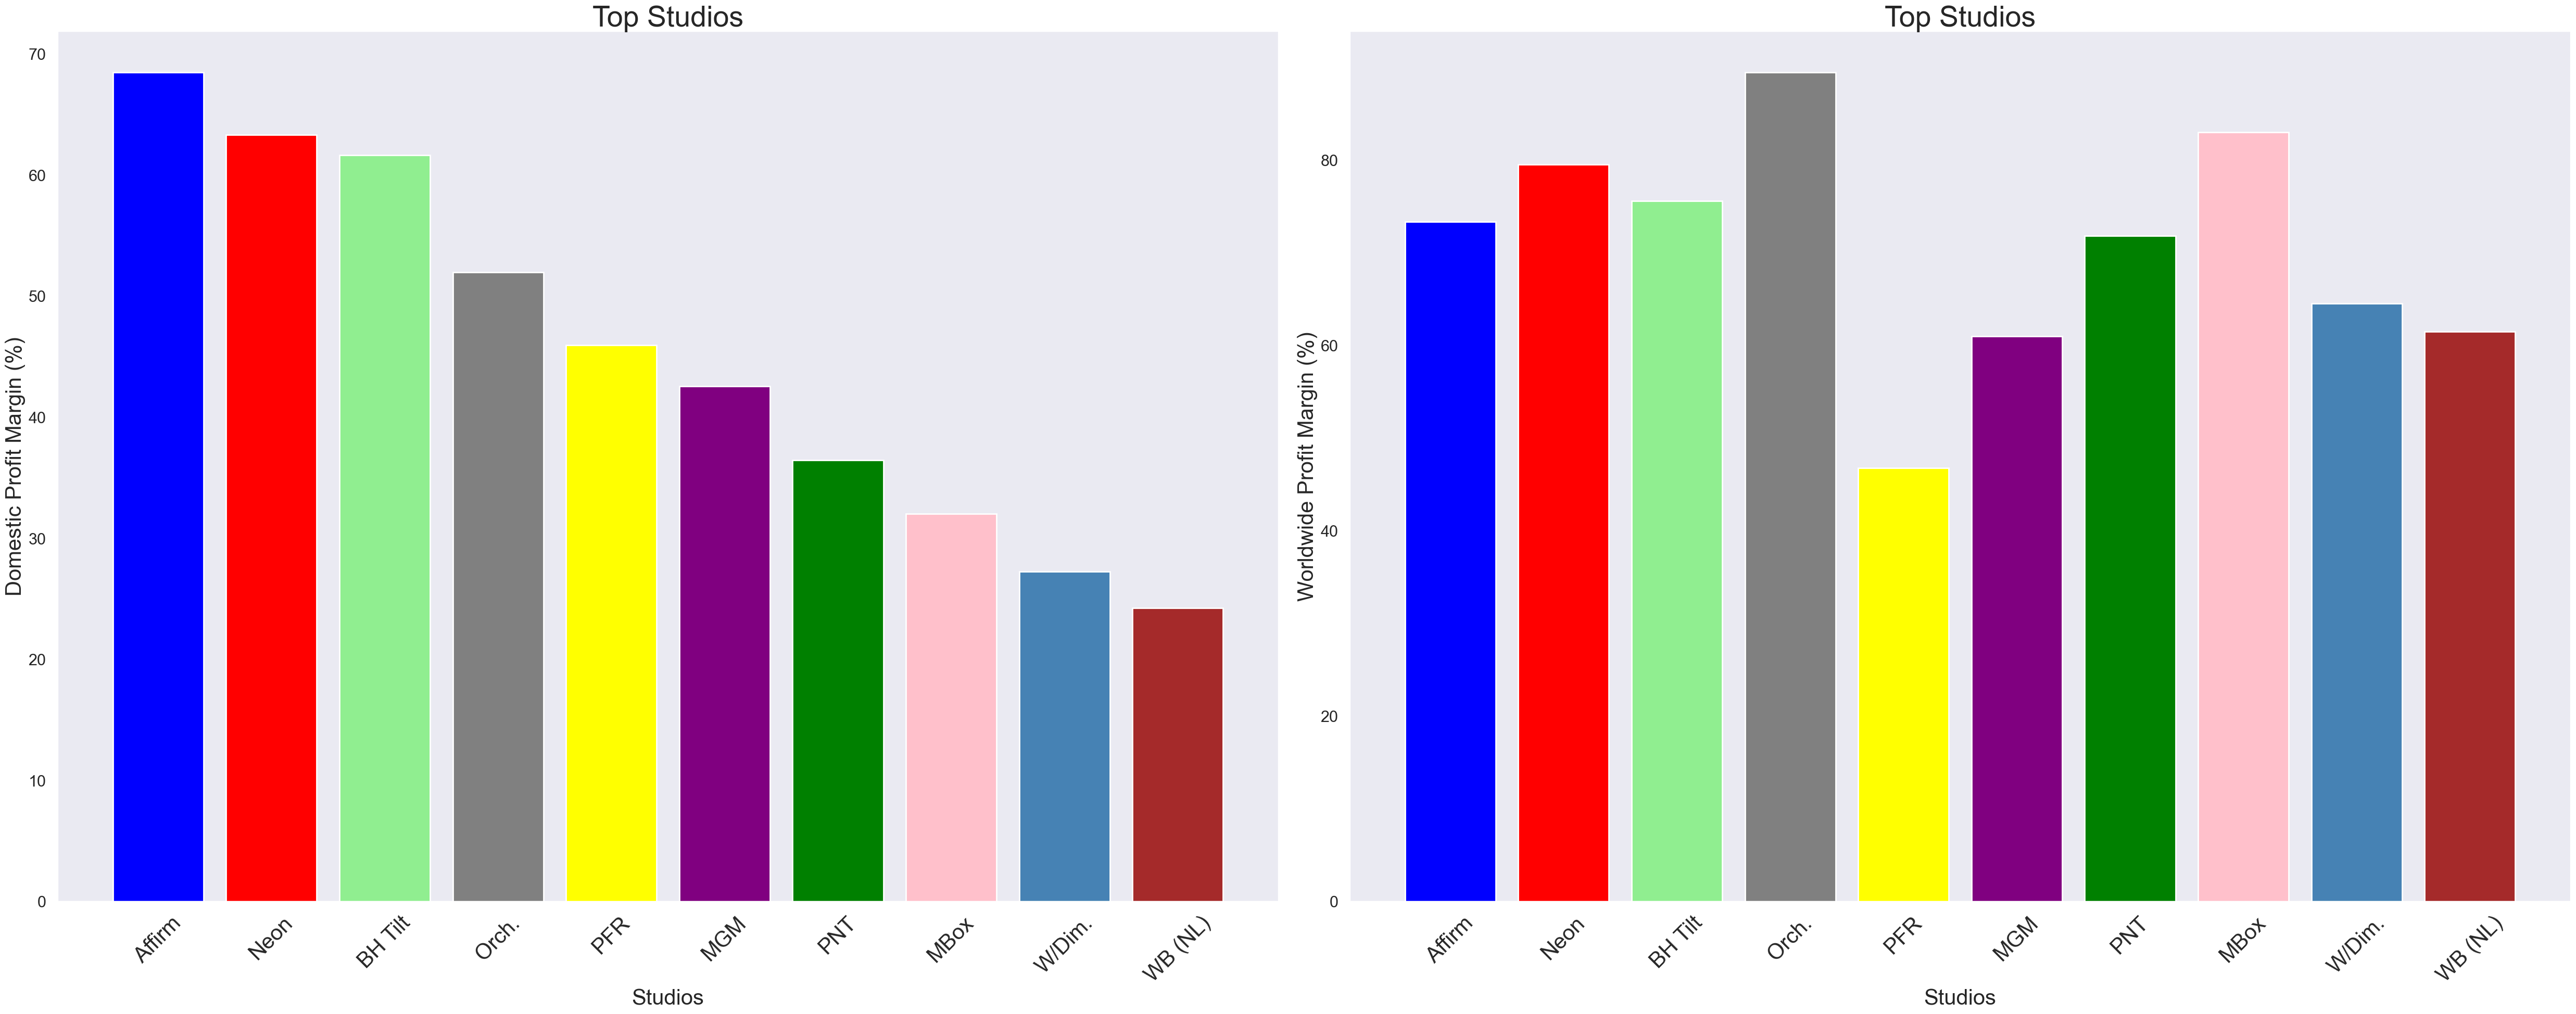

In [20]:
avg_studio = avg_studio.sort_values('dom_profit_margin', ascending=False).iloc[:10]

fig, axs= plt.subplots(figsize=(50,20), ncols=2)

axs[0].bar(avg_studio['studio'], avg_studio['dom_profit_margin'],
          color=['blue', 'red', 'lightgreen', 'grey', 'yellow', 'purple', 'green', 'pink', 'steelblue', 'brown'])
axs[1].bar(avg_studio['studio'], avg_studio['ww_profit_margin'],
          color=['blue', 'red', 'lightgreen', 'grey', 'yellow', 'purple', 'green', 'pink', 'steelblue', 'brown'])

axs[0].set_title('Top Studios', fontsize=40)

axs[0].set_xlabel('Studios', fontsize=30)
axs[0].set_ylabel('Domestic Profit Margin (%)', fontsize=30)
axs[0].set_xticks(range(len(avg_studio)))
axs[0].set_xticklabels(avg_studio['studio'], fontsize=30, rotation=45)

axs[1].set_title('Top Studios', fontsize=40)
axs[1].set_xlabel('Studios', fontsize=30)
axs[1].set_ylabel('Worldwide Profit Margin (%)', fontsize=30)
axs[1].set_xticks(range(len(avg_studio)))
axs[1].set_xticklabels(avg_studio['studio'], fontsize=30, rotation=45)

plt.tight_layout()
plt.savefig('./images/Top 10 Grossing Studios.png', dpi = 150)


According to the above charts, Affirm studio had the highest domestic earnings, but it only ranked fifth in terms of global earnings among all studios. This suggests that there is a disparity between the top earning studios domestically versus globally. Just because a movie studio performs well domestically, it does not necessarily mean that it will be a top earner on a global scale.


# Average Profit and ROI by Release Month

In [21]:
# Graphing Parameters
month = month_new['month_name']
profit_amount = month_new['worldwide_profit']
ROI = month_new['ROI']
wwgross = month_new['worldwide_gross']

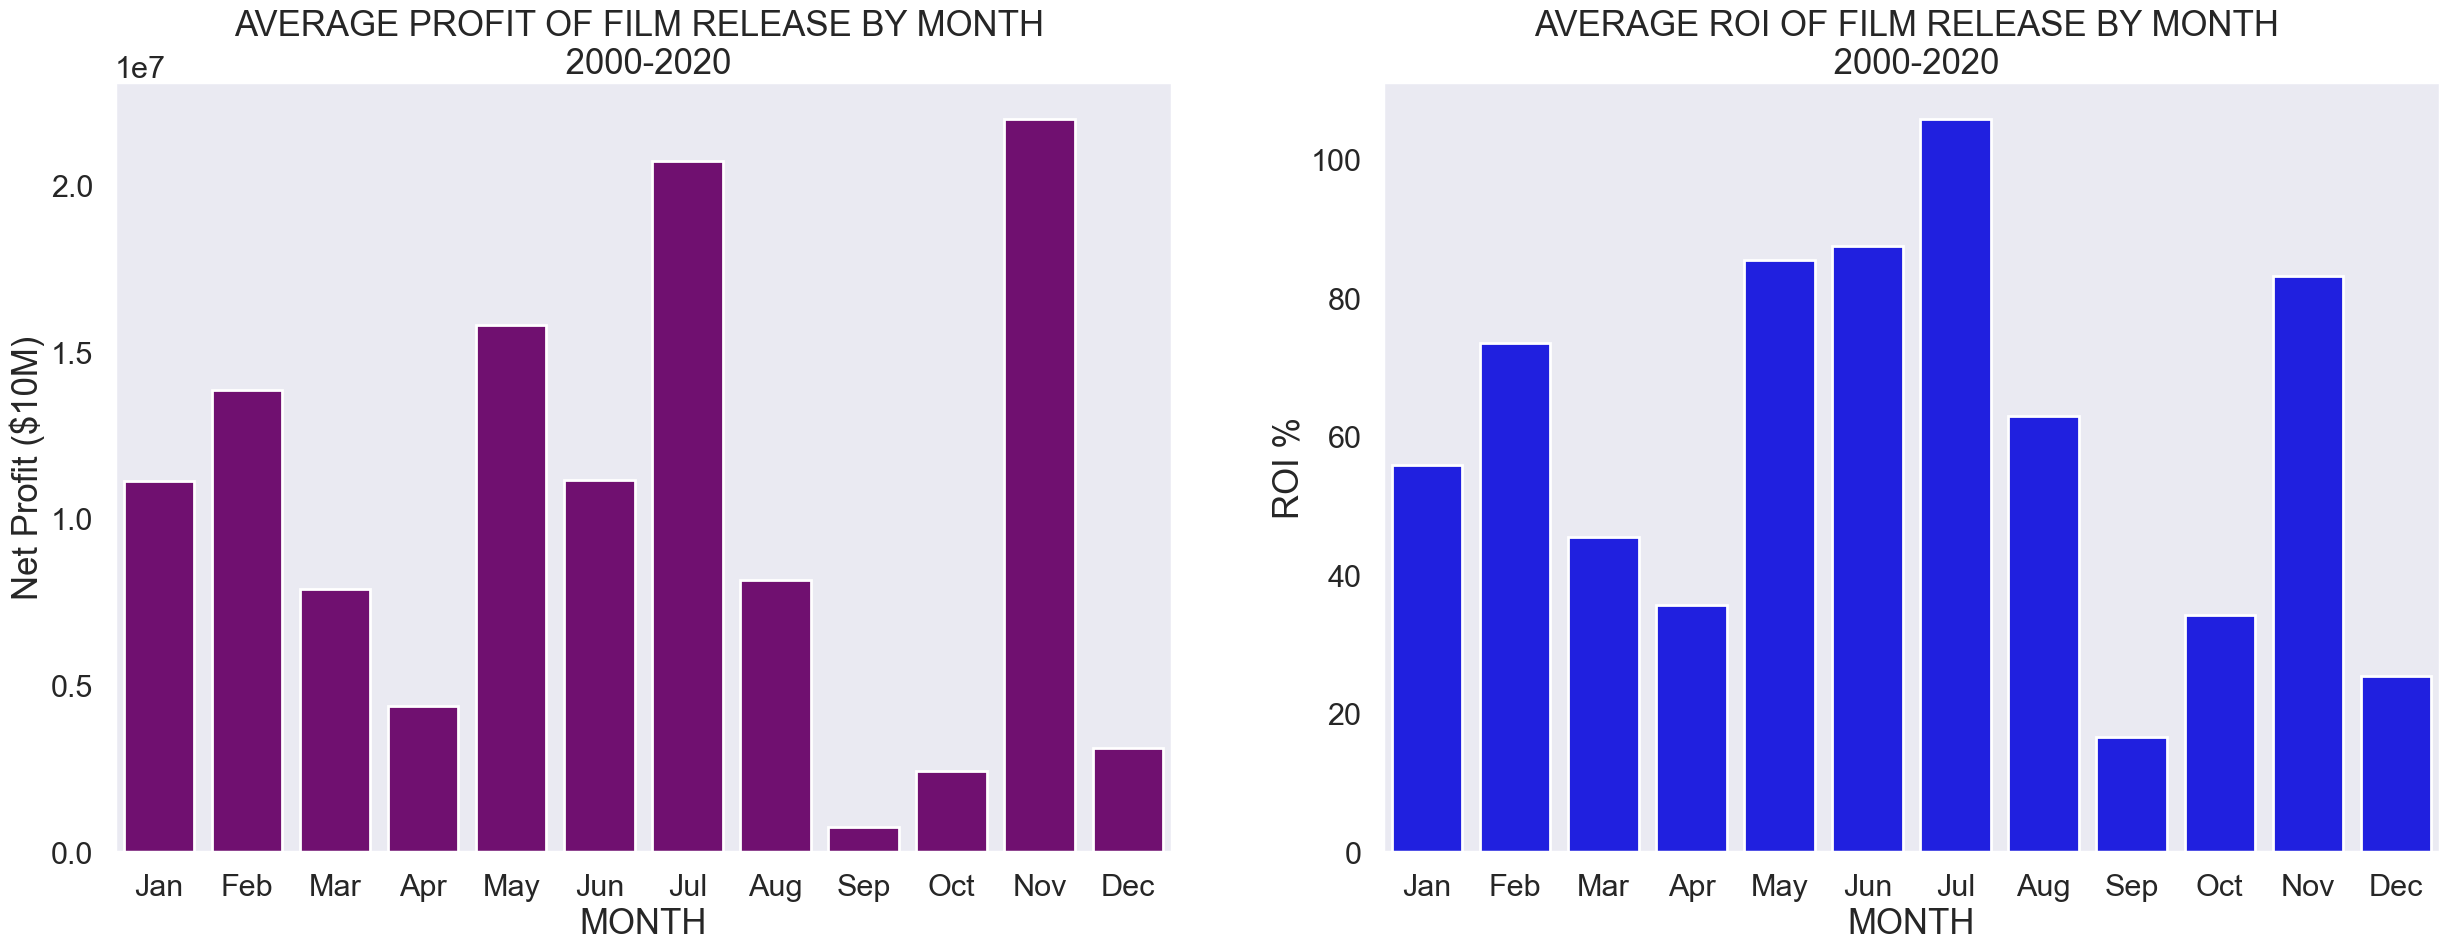

In [22]:
fig, axs = plt.subplots(figsize=(30,10), ncols=2)

sns.barplot(x=month, y=profit_amount, ax=axs[0], color='purple')
sns.barplot(x=month, y=ROI, ax=axs[1], color='blue')
sns.set_context('poster')

axs[0].set_xlabel('MONTH', fontsize=25)
axs[0].set_ylabel('Net Profit ($10M)', fontsize=25)
axs[0].set_title(label='AVERAGE PROFIT OF FILM RELEASE BY MONTH \n 2000-2020', fontsize=25)

axs[1].set_xlabel('MONTH', fontsize=25)
axs[1].set_ylabel('ROI %', fontsize=25)
axs[1].set_title(label='AVERAGE ROI OF FILM RELEASE BY MONTH \n 2000-2020', fontsize=25);

plt.savefig('./images/Average ROI of film release by month.png', dpi = 150)

The films that were released during the months of July, June, November and May yielded the greatest Return on Investment (ROI) respectively compared to those released during other months. On the other hand, movies that premiered in September, December, October and April had the lowest ROIs.





# Movie Genre Distribution

Text(0.5, 1.0, 'Bar Chart - Number of Titles by IMDb genres')

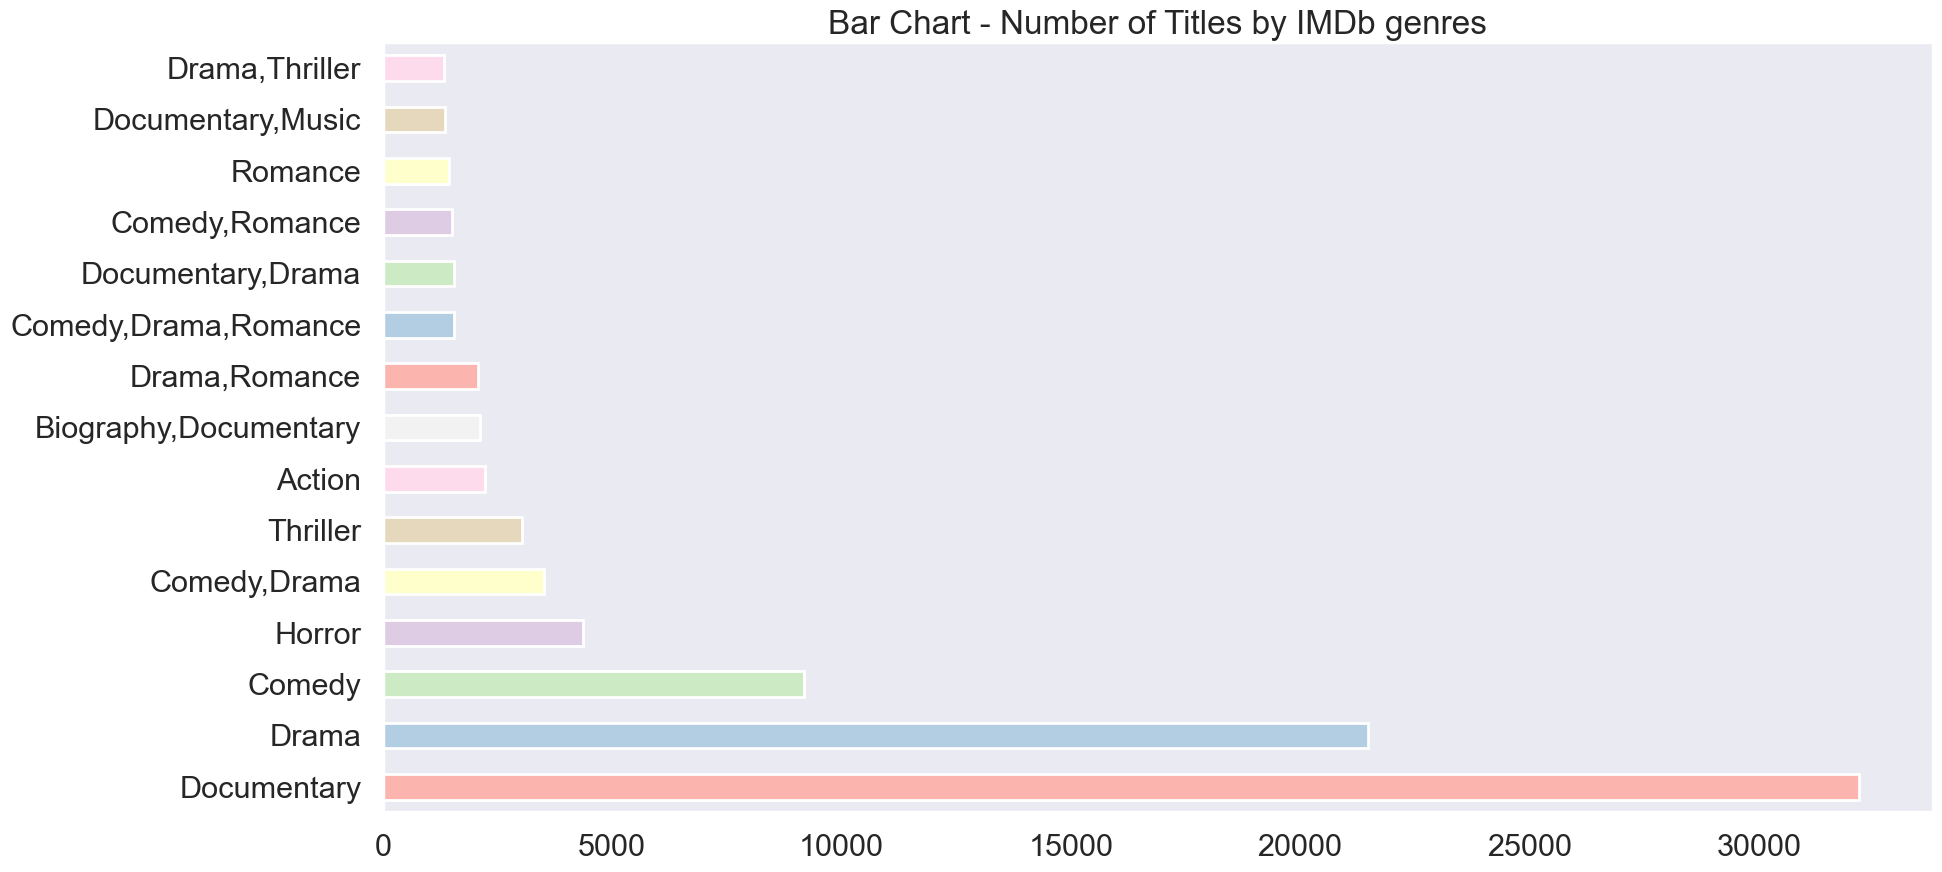

In [23]:
# Distribution of the movie genres (Bar chart)
cmap = plt.get_cmap('Pastel1')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

ax = movie_basics['genres'].value_counts().head(15).plot(kind='barh', figsize=(20,10), color=colors)

plt.title('Bar Chart - Number of Titles by IMDb genres')

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
temp = movie_basics.genres.dropna()
vec = CountVectorizer(token_pattern='(?u)\\b[\\w-]+\\b', analyzer='word').fit(temp)
bag_of_genres = vec.transform(temp)
unique_genres =  vec.get_feature_names_out()
np.array(unique_genres)

array(['action', 'adult', 'adventure', 'animation', 'biography', 'comedy',
       'crime', 'documentary', 'drama', 'family', 'fantasy', 'game-show',
       'history', 'horror', 'music', 'musical', 'mystery', 'news',
       'reality-tv', 'romance', 'sci-fi', 'short', 'sport', 'talk-show',
       'thriller', 'war', 'western'], dtype=object)

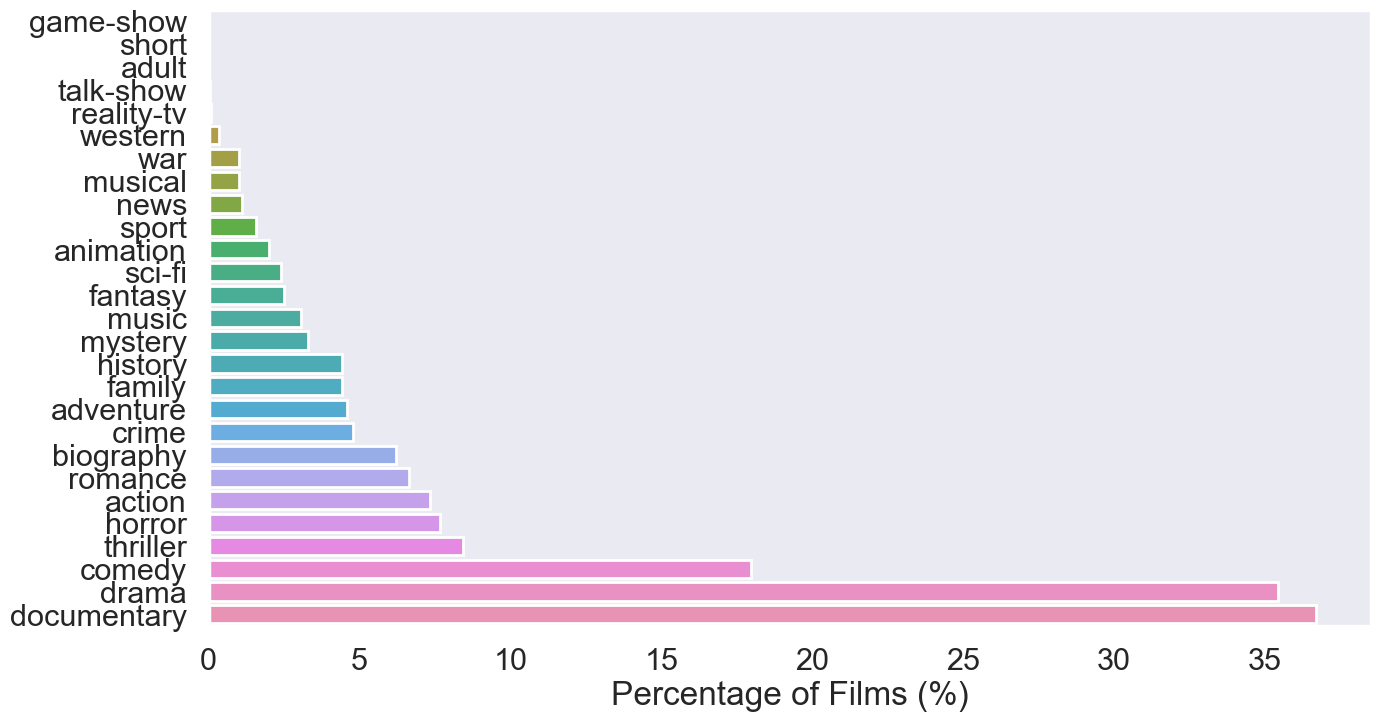

<Figure size 640x480 with 0 Axes>

In [25]:
genres = pd.DataFrame(bag_of_genres.todense(),columns=unique_genres,index=temp.index)
sorted_genres_perc = 100*pd.Series(genres.sum()).sort_values()/genres.shape[0]
plt.figure(figsize=(15,8))
sns.barplot(x=sorted_genres_perc.values,y=sorted_genres_perc.index,orient="h")
plt.xlabel("Percentage of Films (%)")
plt.show()

plt.savefig('./images/Distribution of Film Genres.png', dpi = 150)

The above figure depicts how unique genres are distributed in the dataset. Documentary was found to be the most prevalent genre, accounting for over 35% of the films, followed by drama and comedy.

,id,production_budget,domestic_gross,worldwide_gross,release_year,month_dt,month,dom_profit_margin,ww_profit_margin,worldwide_profit,ROI,start_year,runtime_minutes
id,1.000000,-0.070377,-0.031522,-0.047100,0.035053,-0.021533,-0.021533,0.024859,-0.005200,-0.036593,0.040562,0.035053,0.010941
production_budget,-0.070377,1.000000,0.700590,0.777997,0.054254,-0.056395,-0.056395,0.034485,0.089412,0.651302,-0.057479,0.054254,0.321808
domestic_gross,-0.031522,0.700590,1.000000,0.943445,0.078276,-0.048485,-0.048485,0.043782,0.092900,0.937466,0.091122,0.078276,0.268229
worldwide_gross,-0.047100,0.777997,0.943445,1.000000,0.085258,-0.033459,-0.033459,0.038710,0.083741,0.983452,0.076527,0.085258,0.285588
release_year,0.035053,0.054254,0.078276,0.085258,1.000000,-0.064095,-0.064095,0.005734,0.004128,0.087330,0.031497,1.000000,0.083613
month_dt,-0.021533,-0.056395,-0.048485,-0.033459,-0.064095,1.000000,1.000000,-0.033218,-0.034454,-0.024150,-0.009818,-0.064095,0.137547
month,-0.021533,-0.056395,-0.048485,-0.033459,-0.064095,1.000000,1.000000,-0.033218,-0.034454,-0.024150,-0.009818,-0.064095,0.137547
dom_profit_margin,0.024859,0.034485,0.043782,0.038710,0.005734,-0.033218,-0.033218,1.000000,0.102857,0.036810,0.019245,0.005734,0.033463
ww_profit_margin,-0.005200,0.089412,0.092900,0.083741,0.004128,-0.034454,-0.034454,0.102857,1.000000,0.075359,0.042272,0.004128,0.068457
worldwide_profit,-0.036593,0.651302,0.937466,0.983452,0.087330,-0.024150,-0.024150,0.036810,0.075359,1.000000,0.109003,0.087330,0.252322


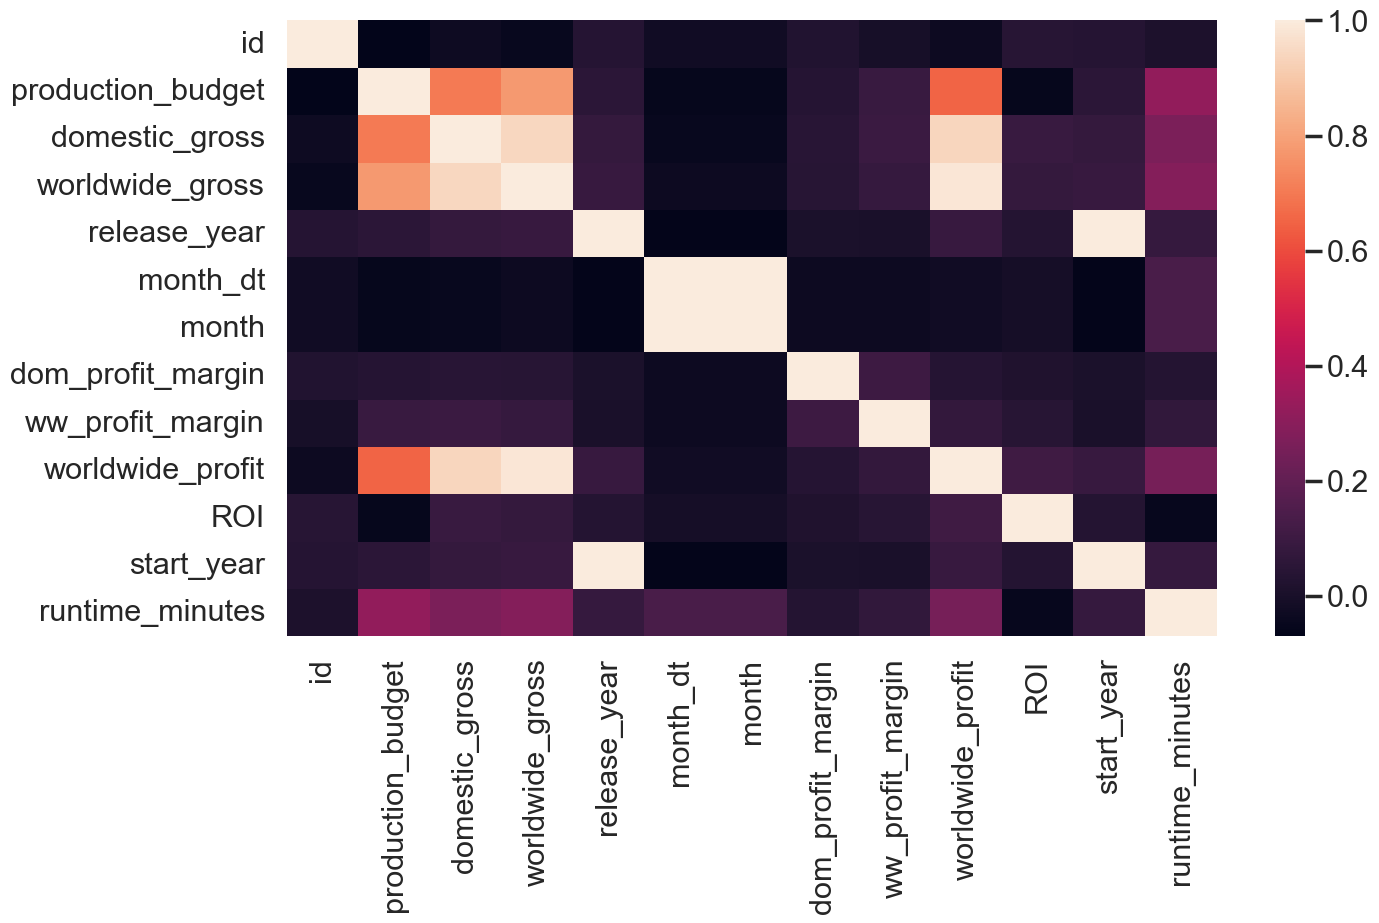

In [26]:
plt.figure(figsize = (15,8))
corr = movie_budgets_basics.corr()
sns.heatmap(corr)
corr

The heatmap suggests a weak or nonexistent correlation between production budget and ROI. Thus, it can be inferred that a high production budget does not necessarily result in higher returns for a movie. However, the situation is different for domestic and worldwide gross, as the calculation methods for movie gross and ROI differ.

# Conclusions

Based on the movie analysis, the following conclusions can be drawn:

- It is advisable to produce movies with a runtime of 90 to 120 minutes.
- To optimize earnings, movie release dates should be limited to May, June, July, and November.
- Microsoft may consider acquiring one of the top grossing studios, such as BH Tilt, Neon, or Orchard Film Studios.
- It would be beneficial for Microsoft to produce movies in the most prevalent genres, namely documentaries, drama, and comedy.